In [24]:
#IMPORT PACKAGES
import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import r2_score



Load DataSets

   school   sex   age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      GP     F  18.0       U     GT3       A     4     4   at_home   teacher   
1      GP     F  17.0       U     GT3       T     1     1   at_home     other   
2      GP     F  15.0       U     LE3       T     1     1   at_home     other   
3      GP     F  15.0       U     GT3       T     4     2    health  services   
4      GP     F  16.0       U     GT3       T     3     3     other     other   
5      GP     M  16.0       U     LE3       T     4     3  services     other   
6      GP     M  16.0       U     LE3       T     2     2     other     other   
7      GP     F  17.0       U     GT3       A     4     4     other   teacher   
8      GP     M  15.0       U     LE3       A     3     2  services     other   
9      GP     M  15.0       U     GT3       T     3     4     other     other   
10     GP     F  15.0       U     GT3       T     4     4   teacher    health   
11     GP     F  15.0       

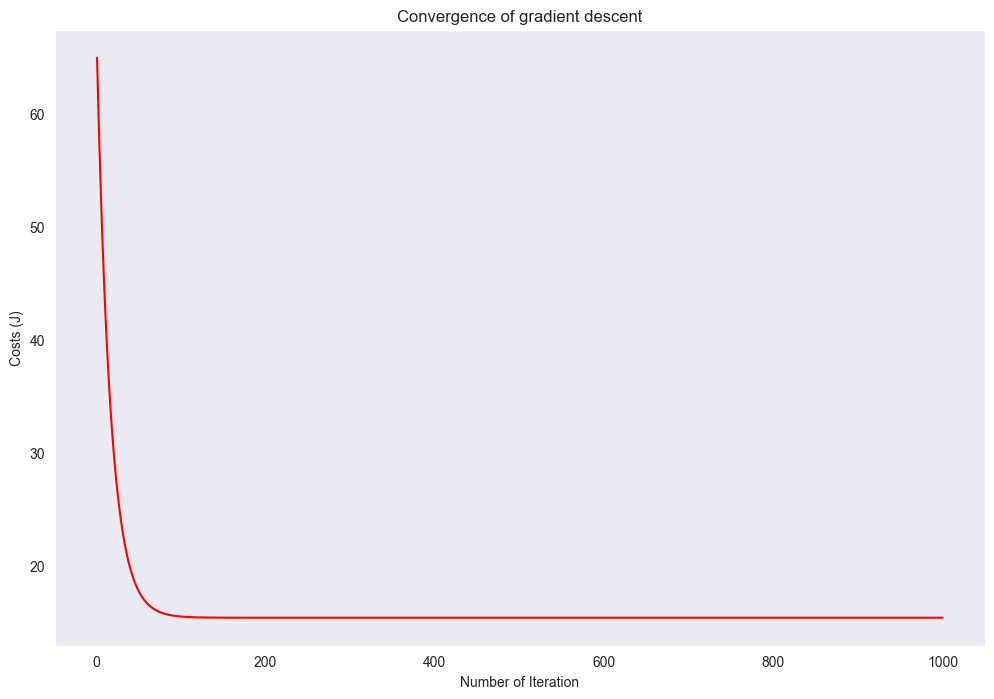

In [25]:
data = datasets.load_dataset("csv",data_files="student-mat_.csv", delimiter=",")
students_df = data["train"].to_pandas() #convert the dataset to pandas
print(students_df.head(15))
print(students_df.shape)
#checking for missing values
missing_values = students_df.isnull().sum()
print(missing_values)

#Drop null values
students_df = students_df.dropna()

#getting the total of null values
print(students_df.isnull().sum().sum())

#Get the number of schools in the dataset
print(students_df["school"].unique())

def gradient_descent(x, y, theta, alpha,iterations):
    """x represent input data sets
    y represents target datatsets
    theta represents initial parameters or weights of the model
    alpha represents learning rate determine how large the steps are when updating theta
    iteration represents the number of times to execute the algorithm"""
    m = y.size #m is initialized with number of training samples in y

    #track how the cost function is envolves and whether the model evolves
    cost_list = [] #cost_list to store the cost or error at each iteration
    #stores changes at each iteration
    theta_list =[theta]
    #loop through iterations
    for i in range(iterations):
        #calculates predictions  for all training samples by multiply x with current theta
        predictions = np.dot(x, theta)
        #calculate the error
        error = predictions - y
        #calculate the cost functions
        cost = 1/ (2 *m) * np.dot(error.T, error)
        #track the cots by using np.squeeze to remove unnecessary dimensions form the cost value
        cost_list.append(np.squeeze(cost))
        #update theta which is a partial derivative of the cost function with respect to each paramter
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        #new value of theta is added to the list
        theta_list.append(theta)
    return theta, theta_list, cost_list
#Using absence as a predictor for the final grade
x = students_df.age
y = students_df.G3

#spliting the data into testing and training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train = x_train.values.reshape(-1,1) #reshaoe to 2D

#setting our parameters to start at zero
theta= np.zeros(x_train.shape[1]).reshape(-1,1)

#Define the number of iteration and alpha values
alpha = 0.0001 #setting the learning rate
iters=1000 # number of iteration the gradient descent will run

#converting y_train into a numpy array
y_train = np.array(y_train).reshape(-1,1)

g, theta_list, cost_list = gradient_descent(x_train, y_train, theta, alpha, iters)
print(cost_list)

#plotting the cost over iterations to visualize convergence
plt.plot(range(1, iters+1), cost_list, color="red")
plt.rcParams["figure.figsize"] = (12,8)
plt.grid()
plt.xlabel("Number of Iteration")
plt.ylabel("Costs (J)")
plt.title("Convergence of gradient descent")
plt.show()